In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [35]:
df = pd.read_csv("fetal_health.csv")

In [36]:
df.shape

(2126, 22)

In [37]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

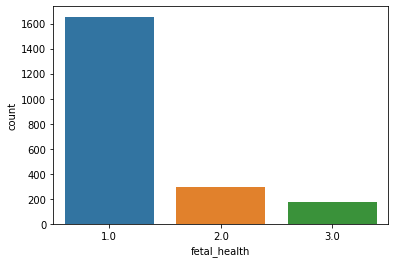

In [5]:
sns.countplot(df["fetal_health"])

<AxesSubplot:>

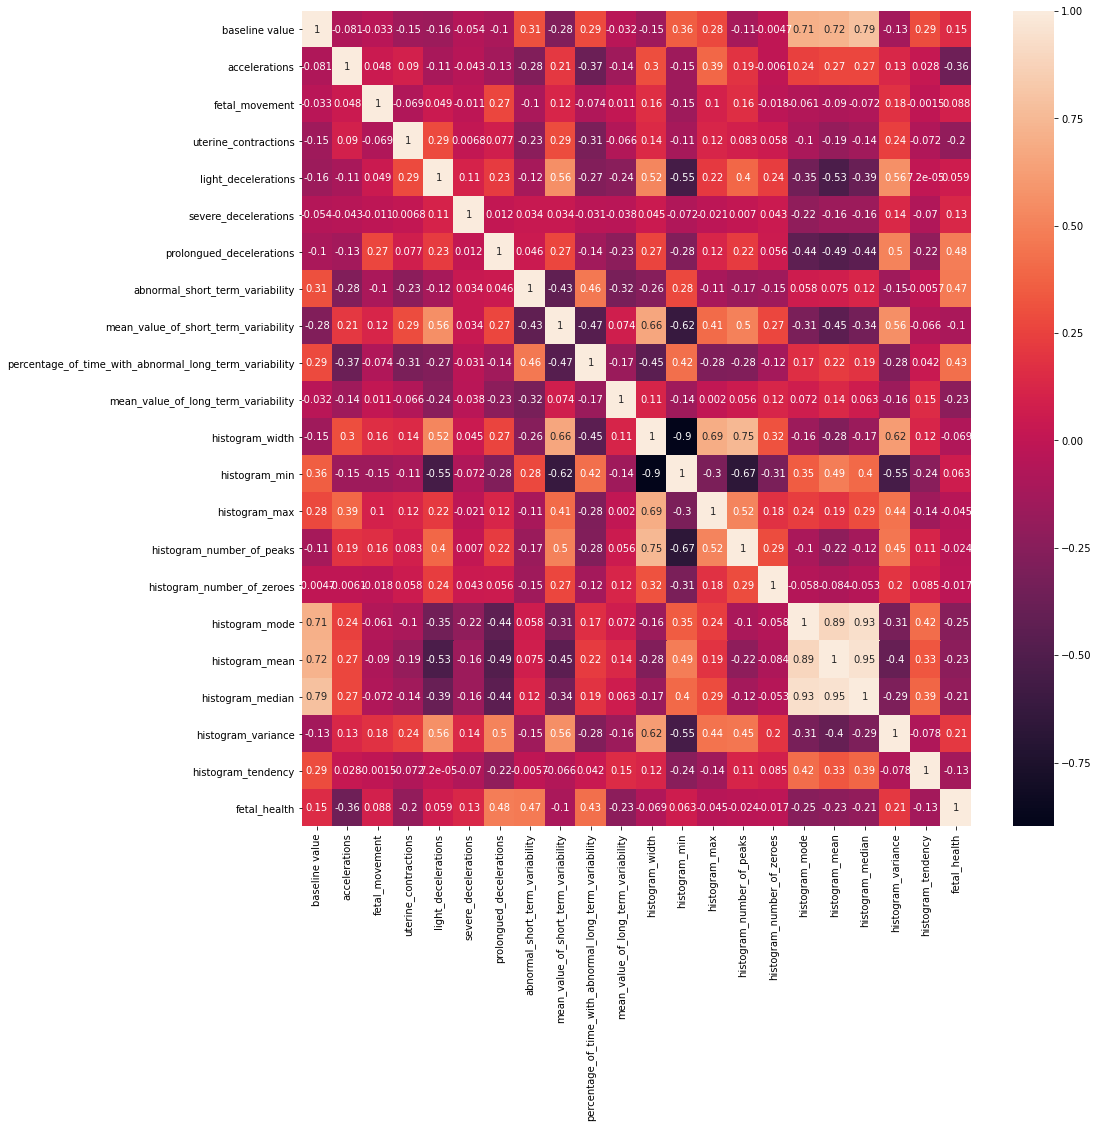

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [38]:
x = df.drop(["fetal_health"], axis=1)
y = df["fetal_health"]

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

print(lr.score(x_train_scaled, y_train))

y_pred_lr = lr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_lr))

0.9038978494623656
0.8824451410658307


In [12]:
print(metrics.confusion_matrix(y_pred_lr, y_test))
print('-----')
print(metrics.classification_report(y_pred_lr, y_test))

[[466  25   3]
 [ 25  63   4]
 [  5  13  34]]
-----
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       494
         2.0       0.62      0.68      0.65        92
         3.0       0.83      0.65      0.73        52

    accuracy                           0.88       638
   macro avg       0.80      0.76      0.78       638
weighted avg       0.88      0.88      0.88       638



In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)

print(svc.score(x_train_scaled, y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.9274193548387096
0.9184952978056427


In [14]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "kernel":['rbf', 'poly', 'sigmoid'],
    "C":[0.1,1,10,100,1000,10000],
    "gamma" : [0.001, 0.01, 0.1, 1, 'scale'],
    "degree" : [1,2,3]
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9227150537634409
SVC(C=100, degree=1, gamma=0.1)
{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [17]:
svc = SVC(C = 100, degree = 1, gamma = 0.1, kernel = "rbf")
svc.fit(x_train_scaled, y_train)

print(svc.score(x_train_scaled, y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.9979838709677419
0.9153605015673981


In [18]:
print(metrics.confusion_matrix(y_pred_svc, y_test))
print('-----')
print(metrics.classification_report(y_pred_svc, y_test))

[[472  22   2]
 [ 22  76   3]
 [  2   3  36]]
-----
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       496
         2.0       0.75      0.75      0.75       101
         3.0       0.88      0.88      0.88        41

    accuracy                           0.92       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.92      0.92      0.92       638



In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

1.0
0.9420062695924765


In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = { 
    'n_estimators': [100,150,200,250,300,400,450,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1]
}

gs = RandomizedSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9375
RandomForestClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       n_estimators=450, n_jobs=-1)
{'n_jobs': -1, 'n_estimators': 450, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'entropy'}


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 450, max_features = "sqrt", max_depth = 12, criterion = "entropy")
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

1.0
0.9435736677115988


In [22]:
print(metrics.confusion_matrix(y_pred_rf, y_test))
print('-----')
print(metrics.classification_report(y_pred_rf, y_test))

[[487  21   2]
 [  7  77   1]
 [  2   3  38]]
-----
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       510
         2.0       0.76      0.91      0.83        85
         3.0       0.93      0.88      0.90        43

    accuracy                           0.94       638
   macro avg       0.89      0.91      0.90       638
weighted avg       0.95      0.94      0.95       638



In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier()
gbr.fit(x_train_scaled, y_train)

print(gbr.score(x_train_scaled, y_train))

y_pred_gbr = gbr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_gbr))

0.9952956989247311
0.9529780564263323


In [26]:
grid_params = {
    'criterion': ['mse', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

gs = RandomizedSearchCV(
    GradientBoostingClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9401881720430106
GradientBoostingClassifier(max_depth=5, max_leaf_nodes=5, n_estimators=450)
{'subsample': 1.0, 'n_estimators': 450, 'max_leaf_nodes': 5, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(subsample = 1, n_estimators = 450, max_leaf_nodes = 5, max_features = None, max_depth = 5, learning_rate = 0.1, criterion = "friedman_mse")
gbr.fit(x_train_scaled, y_train)

print(gbr.score(x_train_scaled, y_train))

y_pred_gbr = gbr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_gbr))

1.0
0.957680250783699


In [28]:
print(metrics.confusion_matrix(y_pred_gbr, y_test))
print('-----')
print(metrics.classification_report(y_pred_gbr, y_test))

[[484  11   3]
 [  9  89   0]
 [  3   1  38]]
-----
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       498
         2.0       0.88      0.91      0.89        98
         3.0       0.93      0.90      0.92        42

    accuracy                           0.96       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.96      0.96      0.96       638



In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [48]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)
x_train_scaled_smote = scaler.fit_transform(x_train_smote)
x_test_scaled_smote = scaler.transform(x_test_smote)

In [49]:
gbr = GradientBoostingClassifier(subsample = 1, n_estimators = 450, max_leaf_nodes = 5, max_features = None, max_depth = 5, learning_rate = 0.1, criterion = "friedman_mse")
gbr.fit(x_train_scaled_smote, y_train_smote)

print(gbr.score(x_train_scaled_smote, y_train_smote))

y_pred_gbr = gbr.predict(x_test_scaled_smote)
print(metrics.accuracy_score(y_test_smote, y_pred_gbr))

0.9997122302158273
0.9724832214765101


In [50]:
print(metrics.confusion_matrix(y_pred_gbr, y_test_smote))
print('-----')
print(metrics.classification_report(y_pred_gbr, y_test_smote))

[[500  10   0]
 [ 18 469   5]
 [  2   6 480]]
-----
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       510
         2.0       0.97      0.95      0.96       492
         3.0       0.99      0.98      0.99       488

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



In [52]:
grid_params = {
    'criterion': ['mse', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

gs = RandomizedSearchCV(
    GradientBoostingClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled_smote, y_train_smote)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9746764203750975
GradientBoostingClassifier(learning_rate=0.2, max_depth=4, max_leaf_nodes=8,
                           n_estimators=350, subsample=0.8)
{'subsample': 0.8, 'n_estimators': 350, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


In [55]:
gbr = GradientBoostingClassifier(criterion='mse', learning_rate=0.2,
                           max_features=None, max_leaf_nodes=8, max_depth = 4,
                           n_estimators=350, subsample = 0.8)

gbr.fit(x_train_scaled_smote, y_train_smote)

print(gbr.score(x_train_scaled_smote, y_train_smote))

y_pred_gbr = gbr.predict(x_test_scaled_smote)
print(metrics.accuracy_score(y_test_smote, y_pred_gbr))

0.9997122302158273
0.9731543624161074


In [57]:
print(metrics.confusion_matrix(y_pred_gbr, y_test_smote))
print('-----')
print(metrics.classification_report(y_pred_gbr, y_test_smote))

[[501  10   0]
 [ 18 469   5]
 [  1   6 480]]
-----
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       511
         2.0       0.97      0.95      0.96       492
         3.0       0.99      0.99      0.99       487

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



In [58]:
gbr = GradientBoostingClassifier(criterion='mse', learning_rate=0.2,
                           max_features=None, max_leaf_nodes=8, max_depth = 4,
                           n_estimators=350, subsample = 0.8)

gbr.fit(x_train_scaled, y_train)

print(gbr.score(x_train_scaled, y_train))

y_pred_gbr = gbr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_gbr))

1.0
0.9592476489028213


In [59]:
print(metrics.confusion_matrix(y_pred_gbr, y_test))
print('-----')
print(metrics.classification_report(y_pred_gbr, y_test))

[[485  12   2]
 [  8  88   0]
 [  3   1  39]]
-----
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       499
         2.0       0.87      0.92      0.89        96
         3.0       0.95      0.91      0.93        43

    accuracy                           0.96       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.96      0.96      0.96       638



In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = { 
    'n_estimators': [100,150,200,250,300,400,450,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1]
}

gs = RandomizedSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9720869886145472
RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       n_estimators=200, n_jobs=-1)
{'n_jobs': -1, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'entropy'}


In [42]:
rf = RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       n_estimators=200, n_jobs=-1)

rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

0.9997122302158273
0.959731543624161


In [43]:
print(metrics.confusion_matrix(y_pred_rf, y_test))
print('-----')
print(metrics.classification_report(y_pred_rf, y_test))

[[473   6   0]
 [ 44 473   1]
 [  3   6 484]]
-----
              precision    recall  f1-score   support

         1.0       0.91      0.99      0.95       479
         2.0       0.98      0.91      0.94       518
         3.0       1.00      0.98      0.99       493

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

